In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("historical_air_quality_2021_en.csv")

In [3]:
df.head(10)

,Station ID,AQI index,Location,Station name,Url,Dominent pollutant,CO,Dew,Humidity,NO2,...,Pressure,PM10,PM2.5,SO2,Temperature,Wind,Data Time S,Data Time Tz,Status,Alert level
0,8767.0,102.00,"10.782978,106.700711","Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",https://aqicn.org/city/vietnam/ho-chi-minh-cit...,pm25,-,NaN,83.0,-,...,"1,009.00",NaN,102.00,-,27.0,3.6,2021-01-21 19:00:00,+07:00,#NAME?,#NAME?
1,8688.0,221.00,"21.0811211,105.8180306","United Nations International School of Hanoi, ...",https://aqicn.org/city/vietnam/hanoi/unis,aqi,-,NaN,77.0,-,...,"1,015.00",NaN,-,-,18.0,1.5,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
2,8641.0,281.00,"21.0215063,105.8188748","Hanoi US Embassy, Vietnam (Đại sứ quán Mỹ, Hà ...",https://aqicn.org/city/vietnam/hanoi/us-embassy,pm25,0.30,NaN,77.0,8.70,...,"1,015.00",NaN,281.00,2.10,18.0,1.5,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
3,13012.0,36.00,"13.998599,107.996482","Gia Lai/phường Thống Nhất - Pleiku, Vietnam",https://aqicn.org/city/vietnam/gia-lai/phuong-...,pm25,3.00,NaN,60.2,6.00,...,923.70,29.00,36.00,1.00,24.3,1.0,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
4,12488.0,68.00,"16.46226,107.596351","Thừa Thiên Huế/83 Hùng Vương, Vietnam",https://aqicn.org/city/vietnam/thua-thien-hue/...,pm25,2.00,NaN,88.0,-,...,"1,015.00",52.00,68.00,-,21.0,1.0,2021-01-21 19:00:00,+07:00,#NAME?,#NAME?
5,13251.0,217.00,"21.04975,105.74187","Hà Nội/UBND P. Minh Khai, Bắc Từ Liêm, Vietnam",https://aqicn.org/city/vietnam/ha-noi/ubnd-p.-...,pm25,12.00,NaN,77.0,65.00,...,"1,015.00",194.00,217.00,2.00,18.0,1.5,2021-01-21 19:00:00,+07:00,#NAME?,#NAME?
6,12976.0,195.00,"21.1137452,105.9268934","Bắc Ninh/Châu Khê, Vietnam",https://aqicn.org/city/vietnam/bac-ninh/chau-khe,pm25,8.00,NaN,77.0,17.00,...,"1,015.00",119.00,195.00,3.00,18.0,1.5,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
7,13250.0,168.00,"22.3221386,104.1214227","Lào Cai/KCN TALOONG1, Vietnam",https://aqicn.org/city/vietnam/lao-cai/kcn-tal...,pm25,37.00,NaN,70.3,2.00,...,"1,003.20",65.00,168.00,17.00,18.5,1.0,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
8,5507.0,48.00,"20.9416,107.1158","Ha Long, Vietnam (Tp Hạ Long)",https://aqicn.org/city/vietnam/ha-long,pm25,-,NaN,95.7,11.00,...,"1,001.00",25.00,48.00,-,17.0,2.0,2021-01-21 19:00:00,+07:00,#NAME?,#NAME?
9,11778.0,18.00,"21.0357507,106.7641068","Quảng Ninh/UBND TP Uông Bí, Vietnam",https://aqicn.org/city/vietnam/quang-ninh/ubnd...,pm25,5.00,NaN,97.5,5.00,...,"1,002.00",12.00,18.00,3.00,15.4,1.0,2021-01-21 05:00:00,+07:00,#NAME?,#NAME?


In [4]:
#df.info()

In [5]:
df.rename(columns={"Station ID":"StationID"},inplace = True)
df.rename(columns={"Station name":"StationName"},inplace = True)
df.rename(columns={"Dominent pollutant":"DominentPollutant"},inplace = True)
df.rename(columns={"Data Time Tz":"DataTimeTz"},inplace = True)
df.rename(columns={"Data Time S":"DataTimeS"},inplace = True)
df.rename(columns={"AQI index":"AQI"},inplace = True)
df.rename(columns={"Alert level":"AlertLevel"},inplace = True)
#df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StationID          2622 non-null   float64
 1   AQI                2618 non-null   object 
 2   Location           2622 non-null   object 
 3   StationName        2622 non-null   object 
 4   Url                2622 non-null   object 
 5   DominentPollutant  2114 non-null   object 
 6   CO                 2615 non-null   object 
 7   Dew                2263 non-null   float64
 8   Humidity           2608 non-null   float64
 9   NO2                2615 non-null   object 
 10  O3                 2608 non-null   object 
 11  Pressure           2608 non-null   object 
 12  PM10               2583 non-null   object 
 13  PM2.5              2614 non-null   object 
 14  SO2                2614 non-null   object 
 15  Temperature        2615 non-null   float64
 16  Wind               2615 

In [7]:
#df.shape

In [8]:
df.drop(['Url','Status','Location','DataTimeTz','SO2','O3','NO2','CO'],axis ='columns',inplace = True)
# axis = 0, or ‘index’ : Drop rows which contain missing values.

# axis = 1, or ‘columns’ : Drop columns which contain missing value.
# inplace = True: việc xóa được thực hiện trên DataFrame hiện tại. 
# inplace = False: trả về một bản sao khi quá trình xóa được thực hiện.

In [9]:
df.head()

,StationID,AQI,StationName,DominentPollutant,Dew,Humidity,Pressure,PM10,PM2.5,Temperature,Wind,DataTimeS,AlertLevel
0,8767.0,102.00,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",pm25,NaN,83.0,"1,009.00",NaN,102.00,27.0,3.6,2021-01-21 19:00:00,#NAME?
1,8688.0,221.00,"United Nations International School of Hanoi, ...",aqi,NaN,77.0,"1,015.00",NaN,-,18.0,1.5,2021-01-21 20:00:00,#NAME?
2,8641.0,281.00,"Hanoi US Embassy, Vietnam (Đại sứ quán Mỹ, Hà ...",pm25,NaN,77.0,"1,015.00",NaN,281.00,18.0,1.5,2021-01-21 20:00:00,#NAME?
3,13012.0,36.00,"Gia Lai/phường Thống Nhất - Pleiku, Vietnam",pm25,NaN,60.2,923.70,29.00,36.00,24.3,1.0,2021-01-21 20:00:00,#NAME?
4,12488.0,68.00,"Thừa Thiên Huế/83 Hùng Vương, Vietnam",pm25,NaN,88.0,"1,015.00",52.00,68.00,21.0,1.0,2021-01-21 19:00:00,#NAME?


In [10]:
tphcm=df[df.StationID == 8767.0]
tphcm

,StationID,AQI,StationName,DominentPollutant,Dew,Humidity,Pressure,PM10,PM2.5,Temperature,Wind,DataTimeS,AlertLevel
0,8767.0,102.00,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",pm25,NaN,83.0,"1,009.00",NaN,102.00,27.0,3.6,2021-01-21 19:00:00,#NAME?
23,8767.0,122.00,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",pm25,NaN,56.5,"1,008.50",NaN,122.00,30.5,2.5,2021-01-22 13:00:00,#NAME?
46,8767.0,114.00,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",pm25,NaN,49.0,"1,007.00",NaN,114.00,32.0,1.5,2021-01-23 15:00:00,#NAME?
69,8767.0,80.00,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",pm25,NaN,74.0,"1,009.00",NaN,80.00,27.0,4.1,2021-01-25 19:00:00,#NAME?
92,8767.0,137.00,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",pm25,NaN,62.0,"1,007.00",NaN,137.00,31.0,5.1,2021-01-26 16:00:00,#NAME?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,8767.0,97.00,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",pm25,24.0,66.0,"1,010.00",-,97.00,31.0,2.8,2021-11-10 10:00:00,#NAME?
2530,8767.0,65.00,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",pm25,24.0,66.0,"1,008.50",-,65.00,31.0,3.6,2021-11-16 12:00:00,#NAME?
2553,8767.0,114.00,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",pm25,25.0,79.0,"1,009.00",-,114.00,29.0,1.5,2021-11-20 09:00:00,#NAME?
2576,8767.0,89.00,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",pm25,20.5,69.0,"1,011.00",-,89.00,26.5,3.0,2021-11-26 09:00:00,#NAME?


In [11]:
tphcm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StationID          114 non-null    float64
 1   AQI                114 non-null    object 
 2   StationName        114 non-null    object 
 3   DominentPollutant  114 non-null    object 
 4   Dew                99 non-null     float64
 5   Humidity           114 non-null    float64
 6   Pressure           114 non-null    object 
 7   PM10               106 non-null    object 
 8   PM2.5              114 non-null    object 
 9   Temperature        114 non-null    float64
 10  Wind               114 non-null    float64
 11  DataTimeS          114 non-null    object 
 12  AlertLevel         114 non-null    object 
dtypes: float64(5), object(8)
memory usage: 12.5+ KB


In [12]:
tphcm.groupby(['DominentPollutant']).count()

,StationID,AQI,StationName,Dew,Humidity,Pressure,PM10,PM2.5,Temperature,Wind,DataTimeS,AlertLevel
DominentPollutant,,,,,,,,,,,,
pm25,114,114,114,99,114,114,106,114,114,114,114,114


In [13]:
new_tphcm = tphcm.drop(['DominentPollutant','PM10','PM2.5','StationName','StationID'],axis=1)
new_tphcm

,AQI,Dew,Humidity,Pressure,Temperature,Wind,DataTimeS,AlertLevel
0,102.00,NaN,83.0,"1,009.00",27.0,3.6,2021-01-21 19:00:00,#NAME?
23,122.00,NaN,56.5,"1,008.50",30.5,2.5,2021-01-22 13:00:00,#NAME?
46,114.00,NaN,49.0,"1,007.00",32.0,1.5,2021-01-23 15:00:00,#NAME?
69,80.00,NaN,74.0,"1,009.00",27.0,4.1,2021-01-25 19:00:00,#NAME?
92,137.00,NaN,62.0,"1,007.00",31.0,5.1,2021-01-26 16:00:00,#NAME?
...,...,...,...,...,...,...,...,...
2507,97.00,24.0,66.0,"1,010.00",31.0,2.8,2021-11-10 10:00:00,#NAME?
2530,65.00,24.0,66.0,"1,008.50",31.0,3.6,2021-11-16 12:00:00,#NAME?
2553,114.00,25.0,79.0,"1,009.00",29.0,1.5,2021-11-20 09:00:00,#NAME?
2576,89.00,20.5,69.0,"1,011.00",26.5,3.0,2021-11-26 09:00:00,#NAME?


In [14]:
new_tphcm.reset_index(drop=True, inplace=True)
new_tphcm

,AQI,Dew,Humidity,Pressure,Temperature,Wind,DataTimeS,AlertLevel
0,102.00,NaN,83.0,"1,009.00",27.0,3.6,2021-01-21 19:00:00,#NAME?
1,122.00,NaN,56.5,"1,008.50",30.5,2.5,2021-01-22 13:00:00,#NAME?
2,114.00,NaN,49.0,"1,007.00",32.0,1.5,2021-01-23 15:00:00,#NAME?
3,80.00,NaN,74.0,"1,009.00",27.0,4.1,2021-01-25 19:00:00,#NAME?
4,137.00,NaN,62.0,"1,007.00",31.0,5.1,2021-01-26 16:00:00,#NAME?
...,...,...,...,...,...,...,...,...
109,97.00,24.0,66.0,"1,010.00",31.0,2.8,2021-11-10 10:00:00,#NAME?
110,65.00,24.0,66.0,"1,008.50",31.0,3.6,2021-11-16 12:00:00,#NAME?
111,114.00,25.0,79.0,"1,009.00",29.0,1.5,2021-11-20 09:00:00,#NAME?
112,89.00,20.5,69.0,"1,011.00",26.5,3.0,2021-11-26 09:00:00,#NAME?


In [15]:
new_tphcm.Pressure=new_tphcm.Pressure.apply(lambda x :( x.replace(',','')))

In [16]:
new_tphcm= new_tphcm.astype({'AQI':'float'})
new_tphcm= new_tphcm.astype({'Pressure':'float'})
new_tphcm= new_tphcm.astype({'DataTimeS':'datetime64'})
new_tphcm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   AQI          114 non-null    float64       
 1   Dew          99 non-null     float64       
 2   Humidity     114 non-null    float64       
 3   Pressure     114 non-null    float64       
 4   Temperature  114 non-null    float64       
 5   Wind         114 non-null    float64       
 6   DataTimeS    114 non-null    datetime64[ns]
 7   AlertLevel   114 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.2+ KB


In [17]:

def Alert_Level(value):
    if value < 50:
        return "good"
    if 50 <= value < 100:
        return "Moderate"
    elif 100 <= value < 150:
        return "Unhealthy for Sensitive Groups"
    elif 150 <= value < 200:
        return "Unhealthy"
    elif 200 <= value < 300:
        return "Very Unhealthy"
    elif value >= 300:
        return "Hazardous"
 
new_tphcm['AlertLevel'] = new_tphcm['AQI'].map(Alert_Level)
#new
    

In [18]:
new_tphcm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   AQI          114 non-null    float64       
 1   Dew          99 non-null     float64       
 2   Humidity     114 non-null    float64       
 3   Pressure     114 non-null    float64       
 4   Temperature  114 non-null    float64       
 5   Wind         114 non-null    float64       
 6   DataTimeS    114 non-null    datetime64[ns]
 7   AlertLevel   114 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.2+ KB


In [19]:
new_tphcm

,AQI,Dew,Humidity,Pressure,Temperature,Wind,DataTimeS,AlertLevel
0,102.0,NaN,83.0,1009.0,27.0,3.6,2021-01-21 19:00:00,Unhealthy for Sensitive Groups
1,122.0,NaN,56.5,1008.5,30.5,2.5,2021-01-22 13:00:00,Unhealthy for Sensitive Groups
2,114.0,NaN,49.0,1007.0,32.0,1.5,2021-01-23 15:00:00,Unhealthy for Sensitive Groups
3,80.0,NaN,74.0,1009.0,27.0,4.1,2021-01-25 19:00:00,Moderate
4,137.0,NaN,62.0,1007.0,31.0,5.1,2021-01-26 16:00:00,Unhealthy for Sensitive Groups
...,...,...,...,...,...,...,...,...
109,97.0,24.0,66.0,1010.0,31.0,2.8,2021-11-10 10:00:00,Moderate
110,65.0,24.0,66.0,1008.5,31.0,3.6,2021-11-16 12:00:00,Moderate
111,114.0,25.0,79.0,1009.0,29.0,1.5,2021-11-20 09:00:00,Unhealthy for Sensitive Groups
112,89.0,20.5,69.0,1011.0,26.5,3.0,2021-11-26 09:00:00,Moderate


Visualization correlation

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] =  (15,5)
plt.rcParams['font.sans-serif'] = 'Open Sans'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#4c4c4c'
plt.rcParams['axes.labelcolor']= '#4c4c4c'
plt.rcParams['xtick.color'] = '#4c4c4c'
plt.rcParams['ytick.color'] = '#4c4c4c'
plt.rcParams['font.size']=12

In [21]:

new_tphcm.corr()

,AQI,Dew,Humidity,Pressure,Temperature,Wind
AQI,1.000000,-0.356459,-0.311933,0.051711,0.083737,-0.162239
Dew,-0.356459,1.000000,0.819489,-0.155654,-0.354225,0.011938
Humidity,-0.311933,0.819489,1.000000,0.056465,-0.763849,-0.078454
Pressure,0.051711,-0.155654,0.056465,1.000000,-0.324018,-0.391819
Temperature,0.083737,-0.354225,-0.763849,-0.324018,1.000000,0.140152
Wind,-0.162239,0.011938,-0.078454,-0.391819,0.140152,1.000000


In [22]:
cols = ['Humidity', 'Temperature', 'Pressure','Wind','Dew']

In [23]:
pearson = dict()
for col in cols:
    pearson[col] = new_tphcm.corr(method='pearson')['AQI'][col]
pearson

{'Humidity': -0.3119330872856137,
 'Temperature': 0.08373695552846944,
 'Pressure': 0.051711044194084836,
 'Wind': -0.16223934100025514,
 'Dew': -0.35645867677402715}

In [24]:
data = pd.DataFrame.from_records([pearson], index=['pearson'])
data

,Humidity,Temperature,Pressure,Wind,Dew
pearson,-0.311933,0.083737,0.051711,-0.162239,-0.356459


In [26]:
# pos = np.arange(len(data))
# pos

In [27]:
plt.rcParams['hatch.color'] = 'black'

In [28]:
plt.style.use('seaborn-white')

In [29]:
rhs = np.linspace(0,100,16)
rhs

array([  0.        ,   6.66666667,  13.33333333,  20.        ,
        26.66666667,  33.33333333,  40.        ,  46.66666667,
        53.33333333,  60.        ,  66.66666667,  73.33333333,
        80.        ,  86.66666667,  93.33333333, 100.        ])

In [30]:
labels = [f'{(rhs[i] + rhs[i+1])/2:.0f}' for i in (range(len(rhs)-1))]
labels

['3',
 '10',
 '17',
 '23',
 '30',
 '37',
 '43',
 '50',
 '57',
 '63',
 '70',
 '77',
 '83',
 '90',
 '97']

In [31]:
new_tphcm['RHC'] = pd.cut(df['Humidity'], bins=rhs, labels=labels).astype('category')

In [32]:
dfs = new_tphcm.groupby('RHC')

C:\Users\Acer\AppData\Local\Temp\ipykernel_15224\1546875915.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x=list(dfs.mean().index), y=dfs.mean().AQI, yerr=dfs.std().AQI,
E:\DA-App\setup\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
E:\DA-App\setup\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<ErrorbarContainer object of 3 artists>

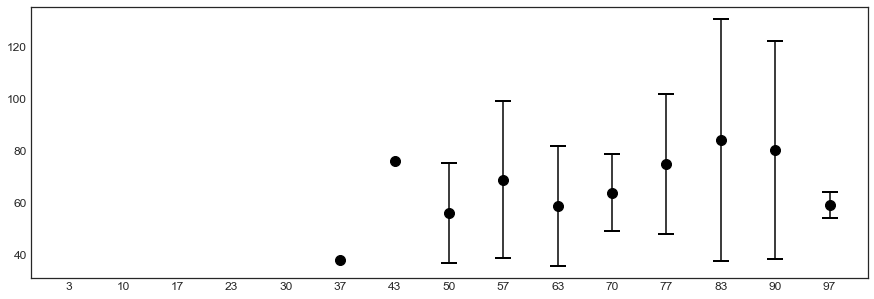

In [33]:
plt.errorbar(x=list(dfs.mean().index), y=dfs.mean().AQI, yerr=dfs.std().AQI,
            fmt='o', capsize=8, capthick=2, color='black',
            marker='o', markersize=10)

Text(0.5, 0, 'RH, %')

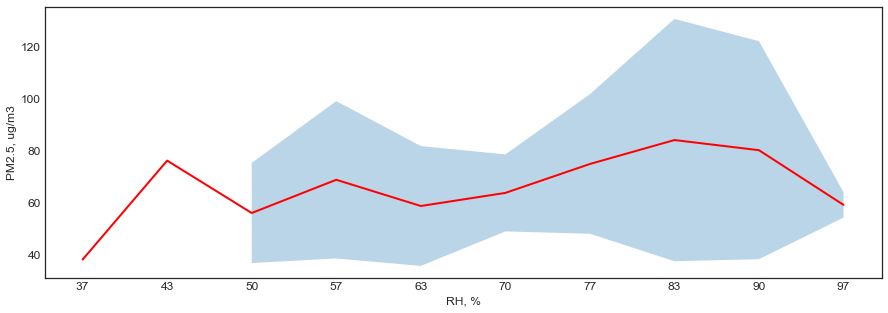

In [34]:
plt.plot(list(dfs.mean().index), dfs.mean().AQI, lw=2, color='r')
plt.fill_between(x=list(dfs.mean().index), y1=dfs.mean().AQI - dfs.std().AQI , 
                 y2=dfs.mean().AQI + dfs.std().AQI, alpha=0.3)
plt.ylabel('PM2.5, ug/m3')
plt.xlabel('RH, %')

In [35]:
# Temperature

In [36]:
tmps = np.linspace(0,40,21)
labels = [f'{(tmps[i] + tmps[i+1])/2:.0f}' for i in (range(len(tmps)-1))]
df['TMPC'] = pd.cut(new_tphcm['Temperature'], bins=tmps, labels=labels).astype('category')

Text(0.5, 0, 'Temperature, $ ^\\circ C$')

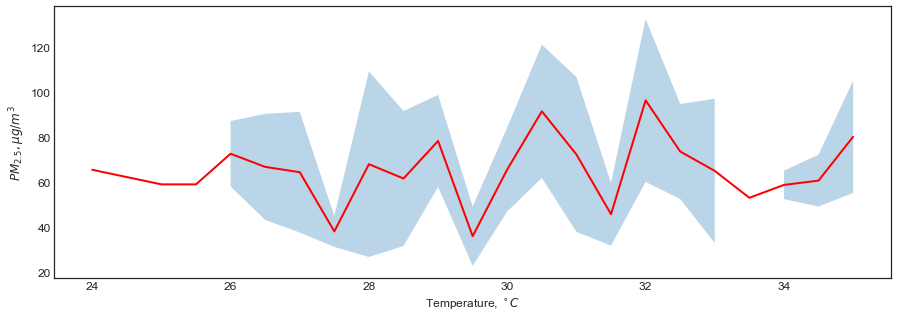

In [37]:
dfs = new_tphcm.groupby('Temperature')
plt.plot(list(dfs.mean().index), dfs.mean().AQI, lw=2, color='r')
plt.fill_between(x=list(dfs.mean().index), y1=dfs.mean().AQI - dfs.std().AQI , 
                 y2=dfs.mean().AQI + dfs.std().AQI, alpha=0.3)
plt.ylabel('$PM_{2.5}, \mu g/m^3$')
plt.xlabel('Temperature, $ ^\circ C$')

In [38]:
# đường xu hướng cho thấy chỉ số AQI phân bố không đều theo nhiệt độ , 
# nhiệt độ cao AQI cao nhưng không phải lúc nào cũng vậy 

Speed wind

In [39]:
speeds = np.linspace(0,12,7)
speeds

array([ 0.,  2.,  4.,  6.,  8., 10., 12.])

In [40]:
labels = [f'{(speeds[i] + speeds[i+1])/2:.0f}' for i in (range(len(speeds)-1))]
labels

['1', '3', '5', '7', '9', '11']

In [41]:
new_tphcm['Wind'] = pd.cut(new_tphcm['Wind'], bins=speeds, labels=labels).astype('category')

In [42]:
dfs = new_tphcm.groupby('Wind')

C:\Users\Acer\AppData\Local\Temp\ipykernel_15224\1546875915.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x=list(dfs.mean().index), y=dfs.mean().AQI, yerr=dfs.std().AQI,
E:\DA-App\setup\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
E:\DA-App\setup\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<ErrorbarContainer object of 3 artists>

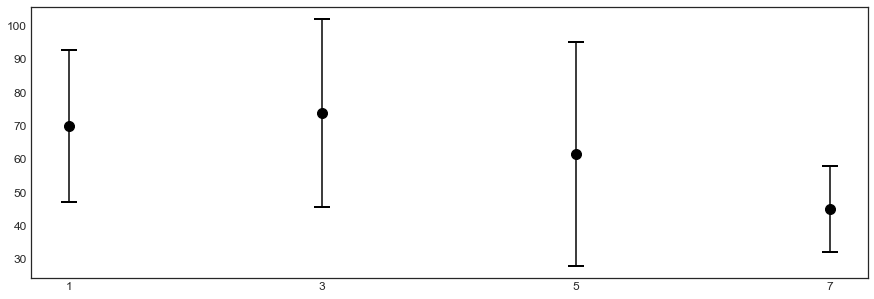

In [43]:
plt.errorbar(x=list(dfs.mean().index), y=dfs.mean().AQI, yerr=dfs.std().AQI,
            fmt='o', capsize=8, capthick=2, color='black',
            marker='o', markersize=10)

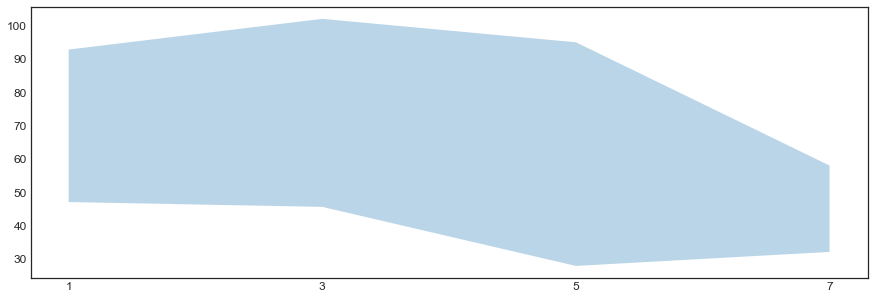

In [44]:
plt.fill_between(x=list(dfs.mean().index), y1=dfs.mean().AQI - dfs.std().AQI , 
                 y2=dfs.mean().AQI + dfs.std().AQI, alpha=0.3)

In [45]:
speeds = np.linspace(0,12,13)
labels = [f'{(speeds[i] + speeds[i+1])/2:.1f}' for i in (range(len(speeds)-1))]
labels

['0.5',
 '1.5',
 '2.5',
 '3.5',
 '4.5',
 '5.5',
 '6.5',
 '7.5',
 '8.5',
 '9.5',
 '10.5',
 '11.5']

In [ ]:
#new_tphcm['Wind'] = pd.cut(new_tphcm['Wind'], bins=speeds, labels=labels).astype('category')


In [ ]:
dfs = new_tphcm.groupby('Wind')

In [ ]:
plt.plot(list(dfs.mean().index), dfs.mean().AQI, lw=2, color='r')
plt.fill_between(x=list(dfs.mean().index), y1=dfs.mean().AQI - dfs.std().AQI , 
                 y2=dfs.mean().AQI + dfs.std().AQI, alpha=0.3)
plt.ylabel('$PM_{2.5}, \mu g/m^3$')
plt.xlabel('Speed Wind')